### Exploring IRIS dataset with scikit-learn

In [1]:
# importing dataset
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
# preparing training and test dataset
x = iris.data
y = iris.target

In [8]:
x.shape, y.shape

((150, 4), (150,))

We will use KNN for modelling.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
knn_1.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
knn.predict([[3,5,4,2]])

array([2])

Let's use a combination of values to predict

In [14]:
x_new = [[3,5,4,2], [5,4,3,2]]
knn.predict(x_new)

array([2, 1])

Let's use a different value for n

In [27]:
# value of k = 5
knn_5 = KNeighborsClassifier(n_neighbors = 5)

# fit the model
knn_5.fit(x,y)

x_new = [[3,5,4,2], [5,4,3,2]]
# predict the response for new observations
knn_5.predict(x_new)

array([1, 1])

#### Let's use a different classification model

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
logreg.predict(x_new)

array([2, 0])

#### Evaluating the model

In [24]:
from sklearn import metrics

y_pred = logreg.predict(x)
metrics.accuracy_score(y, y_pred)

0.95999999999999996

### KNN (k = 1  and k = 5)

In [28]:
y_pred_knn1 = knn_1.predict(x)
y_pred_knn5 = knn_5.predict(x)
metrics.accuracy_score(y, y_pred_knn1), metrics.accuracy_score(y, y_pred_knn5)

(1.0, 0.96666666666666667)

The accuracy of 1 when k=1 means the model predicted all observations correctly

We usually a train and test split to fit and then predict using our model.

### Can we find a better value for k

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 4)

scores = []
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Accuracy Score')

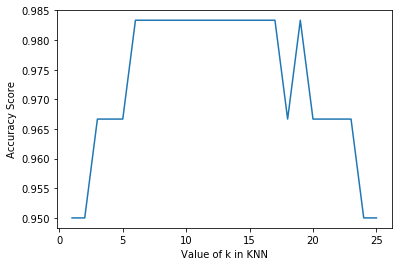

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k in KNN')
plt.ylabel('Accuracy Score')

The best value of k is between 6-17.